# Proyecto Automobile

Este dataset consta de datos del Anuario automotriz de Ward de 1985 y el objetivo es predecir el precio del automóvil a partir de sus caracteristicas, las cuales se puede dividir en tres categorías:

1. La especificación de un automóvil en términos de varias características
2. Su calificación de riesgo de seguro asignada
3. Sus pérdidas normalizadas en uso en comparación con otros automóviles.

Y las variables del datset son:
- Symboling: Factor de riesgo asociado con el precio, evaluado en una escala del -2 al 3. Si el automóvil es más riesgoso de lo que indica su precio el factor del riesgo será mayor, de lo contrario será menor
- Normalized-losses: Pérdidas normalizadas expresadas en valores continuos de 65 a 256
- Make: Marca Alfa-Romero, Audi, BMW, Chevrolet, Dodge, Honda, Isuzu, Jaguar, Mazda, Mercedes-Benz, Mercury, Mitsubishi, Nissan, Peugot, Plymouth, Porsche, Renault, Saab, Subaru, Toyota, Volkswagen, Volvo
- Fuel-type: tipo de combustible diesel, gas
- Aspiration: Tipo de aspiración, std o turbo
- Num-of-doors: Número de puertas, two o four
- Body-style: Estilo de la carrocería, hardtop(techo duro), wagon(vagón), sedan(sedán), hatchback(compacto), convertible(convertible)
- Drive-wheels: Ruedas motrices, rwd, fwd, 4wd
- Engine-location: ubicación del motor front(delantero), rear(trasero)
- Wheel-base: Distancia de los ejes expresado en valores continuos
- Length: Longitud expresada en valores continuos
- Width: Ancho expresado en valores continuos
- Height: Alto expresado en valores continuos
- Curb-weight: Peso en vacío expresado en valores continuos
- Engine-type: Tipo de motor dohc, ohcv, ohc, l, rotor, ohcf, dohcv
- Num-of-cylinders: Número de cilindros four, six, five, three, twelve, two, eight
- Engine-size: Tamaño del motor expresado en valores continuos
- Fuel-system: Sistema de combustible mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi
- Bore: Diamétro expresado en valores continuos
- Stroke: carrera o distancia recorrida por el pistón durante cada ciclo expresado en valores continuos
- Compression-ratio: Relación de compresión expresada en valores continuos
- Horsepower: Caballos de fuerza expresado en valores continuos
- Peak-rpm: RPM máximas (revoluciones por minuto que alcanza un vehículo cuando se encuentra a potencia máxima) expresado en valores continuos
- City-mpg: Consumo de combustible "millas por galón" en ciudad, expresado en valores continuos
- highway-mpg: Consumo de combustible "millas por galón" en carretera, expresado en valores continuos
- Price: Precio 

https://www.kaggle.com/toramky/automobile-dataset


In [37]:
# importación de librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC

## Carga de datos

In [2]:
data = pd.read_csv("automobile_data.csv")
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Se observa que la columna normalized-losses tiene el carácter "?". Se debe revisar si otras variables también contienen dicho carácter para reemplazarlo por NA.

In [3]:
# información de cada tipo de dato
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

La variable normalized-losses dice que es de tipo object pero según la descripción de la misma contiene valores continuos, puede ser que el carácter "?" este generando problemas.

## Análisis exploratorio de los datos

In [4]:
# revisar nulos 
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

No se aprecian valores nulos, es decir que no se está considerando el carácter "?" como nulo.

In [5]:
# valores únicos de cada variable categórica
data.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

Según la descripción, la variable make es categóricas con 22 valores únicos.

In [6]:
# principales estadísticas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


Del resumen estadístico no se aprecian valores en cero ni tampoco se observa la variable normalized-losses. Primero se va a corregir los nulos para que el resumen contenga todas las variables numéricas. También se va a cambiar el tipo de dato de la variable symboling por object.

### Valores nulos

De la descripción de las variables se pudo observar que la variable "normalized-losses" es numérica y contiene el carácter "?", que está cambiando el tipo de dato de númerico a objecto. En esta sección se van a buscar las variables que contengan dicho carácter para reemplazarlos con NA.

In [7]:
# se busca y se reemplazan todos los carácteres "?" por NA
automobile_data_copy = data.copy()
automobile_data_copy = automobile_data_copy.replace("?", np.nan)
automobile_data_copy.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [8]:
# revisión de las variables que contengan nulos nuevamente
nulos = automobile_data_copy.isnull().sum().to_frame()
nulos = nulos.loc[nulos[0] != 0]
nulos

,0
normalized-losses,41
num-of-doors,2
bore,4
stroke,4
horsepower,2
peak-rpm,2
price,4


Las variables normalized-losses, num-of-doors, bore, stroke, horsepower, peak-rpm y price contenían el carácter "?", y ahora se pueden ver como datos nulos.

In [9]:
# se separan las variables numéricas y categóricas
df = automobile_data_copy.nunique().to_frame()
variablesNumericas = df.loc[df[0] > 22]
variablesCategoricas = df.loc[df[0] <= 22]

In [10]:
variablesNumericas

,0
normalized-losses,51
wheel-base,53
length,75
width,44
height,49
curb-weight,171
engine-size,44
bore,38
stroke,36
compression-ratio,32


In [11]:
len(variablesCategoricas)

11

In [12]:
# se pasa a una lista las variables numéricas y las que continen nulos, se encuentra la diferencia entre ellas
# y se convierten a tipo numero
listaVariablesNumericas = list(variablesNumericas.index)
listaVariablesConNulos = list(nulos.index)
variablesAConvertir = set(listaVariablesNumericas) & set(listaVariablesConNulos)
automobile_data_copy[list(variablesAConvertir)] = automobile_data_copy[list(variablesAConvertir)].astype('float64')

In [13]:
# Ahora se pasa a tipo object las variables categóricas
automobile_data_copy[list(variablesCategoricas.index)] = automobile_data_copy[list(variablesCategoricas.index)].astype('object')

In [14]:
# se revisa nuevamente el tipo de dato de cada variable para comprobar la corrección
automobile_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    object 
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Ahora se aprecian 11 variables de tipo object, el cual es el número de las variables categóricas hallado.

In [15]:
# principales estadísticas nuevamente
automobile_data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
normalized-losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,201.0,3.329751,0.273539,2.54,3.15,3.31,3.59,3.94
stroke,201.0,3.255423,0.316717,2.07,3.11,3.29,3.41,4.17
compression-ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


- El resumen de las principales estadisticas incluye todas las variables númericas.
- No se aprecian valores en cero.

In [16]:
# principales estadísticas variables categóricas
automobile_data_copy.describe(include=object).T

,count,unique,top,freq
symboling,205,6,0,67
make,205,22,toyota,32
fuel-type,205,2,gas,185
aspiration,205,2,std,168
num-of-doors,203,2,four,114
body-style,205,5,sedan,96
drive-wheels,205,3,fwd,120
engine-location,205,2,front,202
engine-type,205,7,ohc,148
num-of-cylinders,205,7,four,159


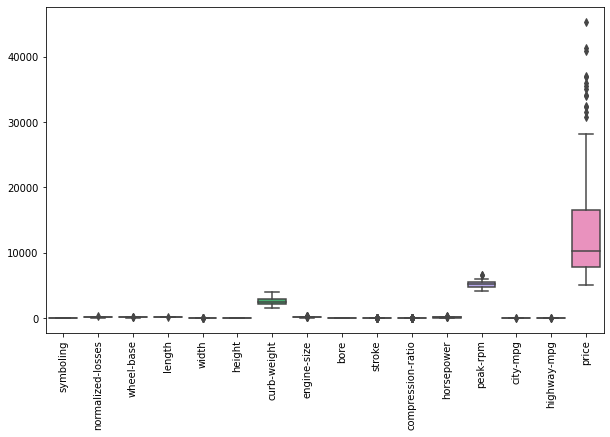

In [17]:
# rango de los datos
plt.figure(figsize=(10, 6))
sns.boxplot(data=automobile_data_copy)
plt.xticks(rotation=90)
plt.show()

El rango de los datos para las variables price, peak-rpm y curb-weight es más amplio que para las demñas variables, se deben estandarizar.

In [25]:
# relación entre las variables
#sns.pairplot(automobile_data_copy)

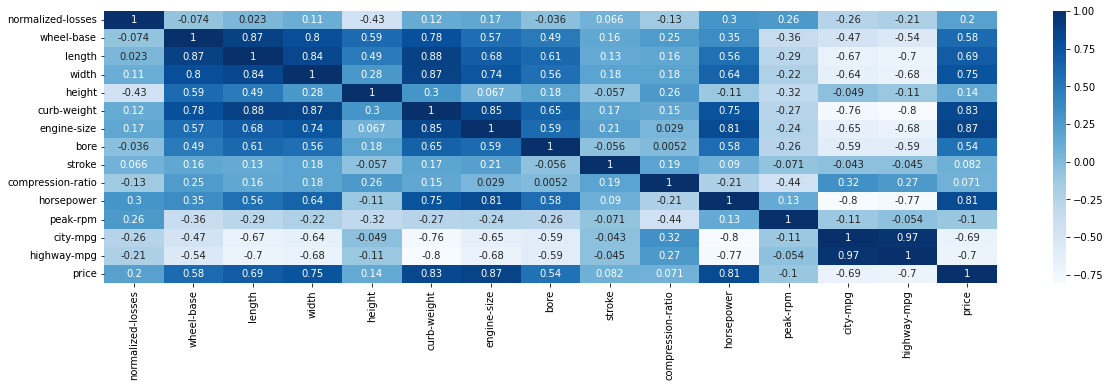

In [23]:
# matriz de correlación entre las variables
plt.figure(figsize = (20,5))
sns.heatmap(automobile_data_copy.corr(), cmap="Blues", annot=True)
plt.show()

- La variable curb-weight está correlacionada con las variables length y width.
- La variable lenght y wheel-base estan correlacionadas, el largo del carro con la distancia entre los ejes.
- El precio del autómovil está altamente correlacionado con el tamaño del motor y caballos de fuerza y esta inversamente correlacionado con el consumo de gasolina por milla, tanto en ciudad como en carretera.

En general las medidas del carro están altamente correlacionados, se debe revisar para la propuesta del modelo predictivo.

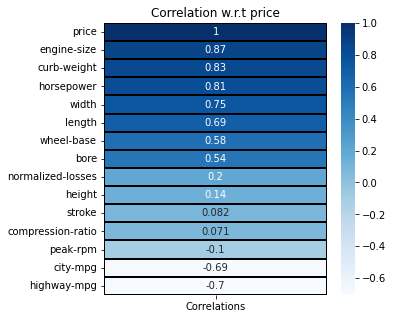

In [18]:
# correlación con la variable salida
corr = automobile_data_copy.corrwith(automobile_data_copy['price']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True, cmap="Blues", linewidths=0.4, linecolor='black')
plt.title('Correlation w.r.t price')
plt.show()

- La variable más correlacionada con la variable precio es el tamaño del motor, seguido de la variable peso en vacío y el número de los caballos de fuerza.
- La variable precio también está inversamente correlacionada con la variable peak-rpm (revoluciones por minuto), seguido del consumo de gasolina por milla en ciudad y en carro.

### Variables númericas

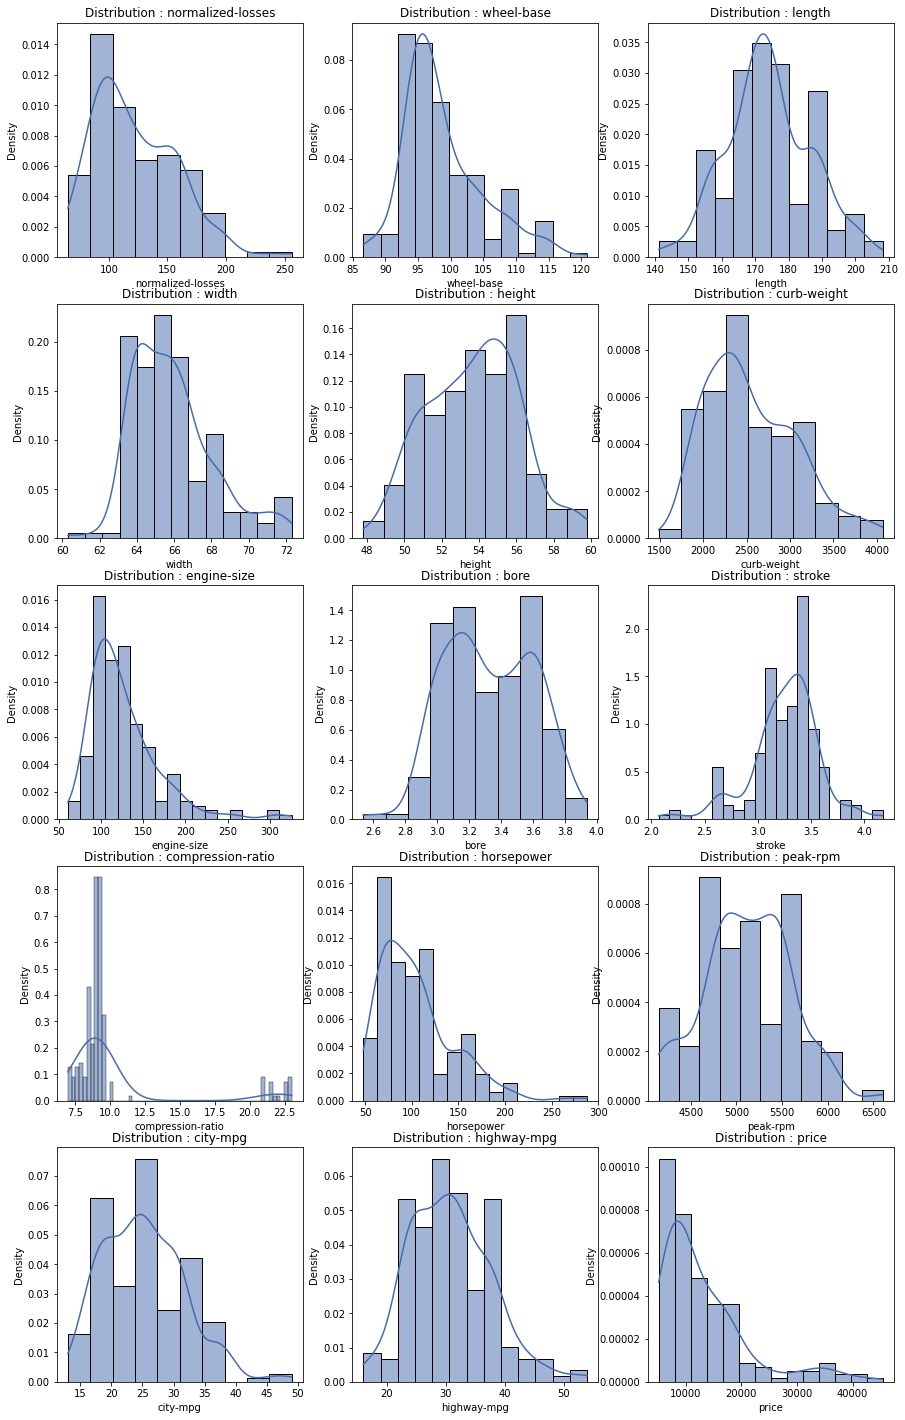

In [25]:
# impresión de la distribución de las variables númericas
colors = ['#446BAD']
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15,25))
for i in range(len(variablesNumericas)):
    plt.subplot(5,3,i+1)
    sns.histplot(automobile_data_copy[variablesNumericas.index[i]], stat='density', kde=True, color='#446BAD')
    title = 'Distribution : ' + variablesNumericas.index[i]
    plt.title(title)
plt.show()

- Las distribución de las variables es similar a una normal con algunas tendencias a la derecha o a la izquierda.
- La variable compression-ratio presenta dos picos, uno en 8 y otro en 21 más o menos.


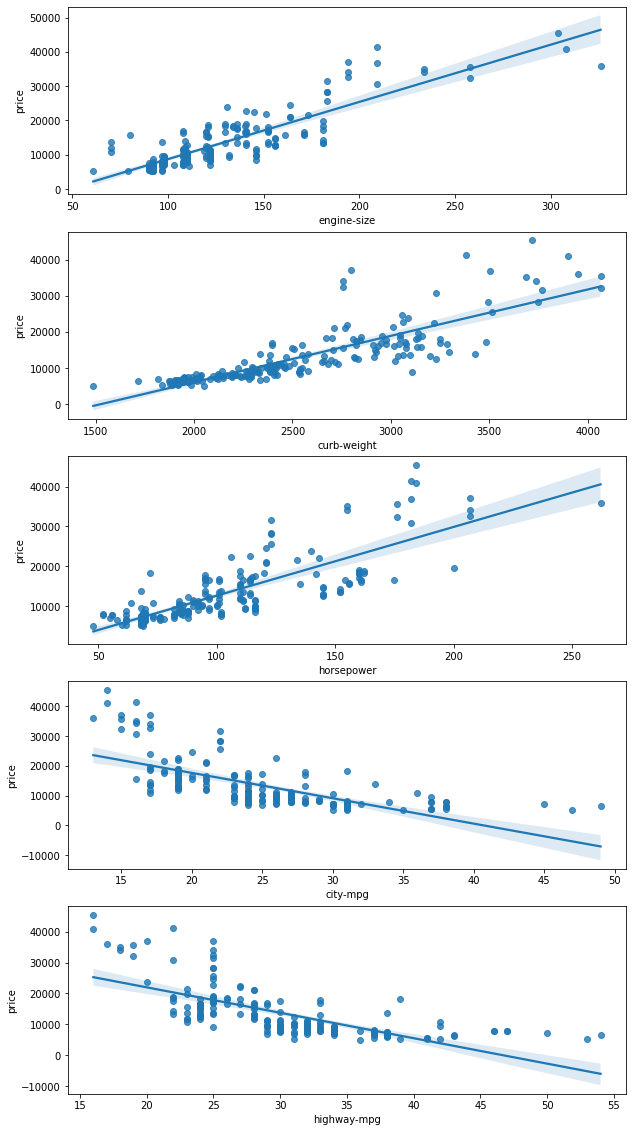

In [26]:
# variables númericas con mayor correlación
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10,20))
highCorrNum = ["engine-size", "curb-weight", "horsepower", "city-mpg", "highway-mpg"]
for num, var in enumerate(highCorrNum):
    plt.subplot(5,1,num+1)
    sns.regplot(x=automobile_data_copy[var], y="price", data=automobile_data_copy)
plt.show()


- Las variables engine-size, curb-weight, horsepower tienen una relación positiva respecto a la variable precio y su correlación es mayor al 80%.
- Las variables city-mpg, highway-mpg tienen una relación negativa con la variable precio y su correlación es del 69% y 70%.
- De la gráfica se observa la tendencia en la relación directamente proporcional en las dos primeras variables e inversamente proporcional para las dos últimas variables.

### Variables categóricas

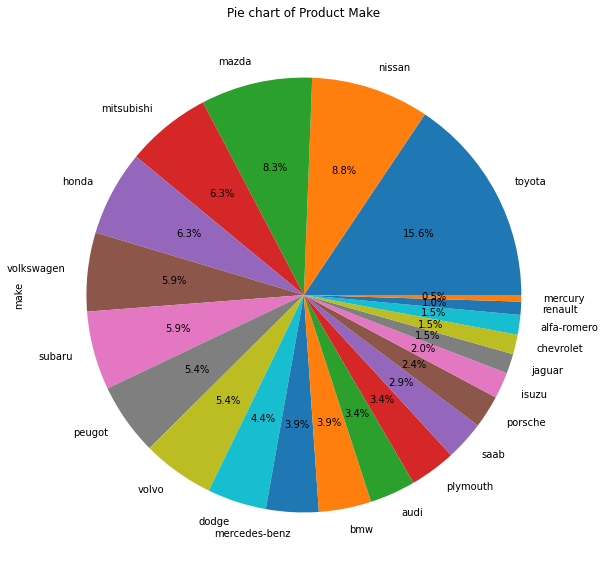

In [19]:
fig = plt.figure(figsize=(10, 10))
automobile_data_copy['make'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Pie chart of Product Make")
plt.show()

- La marca más vendida es Toyota, seguido de Nissan y Mazda.

In [28]:
plt.figure(figsize=(10, 10))
automobile_data_copy['make'].value_counts().to_frame().style.bar(subset="make", color = '#446BAD')

,make
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
volkswagen,12
subaru,12
peugot,11
volvo,11
dodge,9


<Figure size 720x720 with 0 Axes>

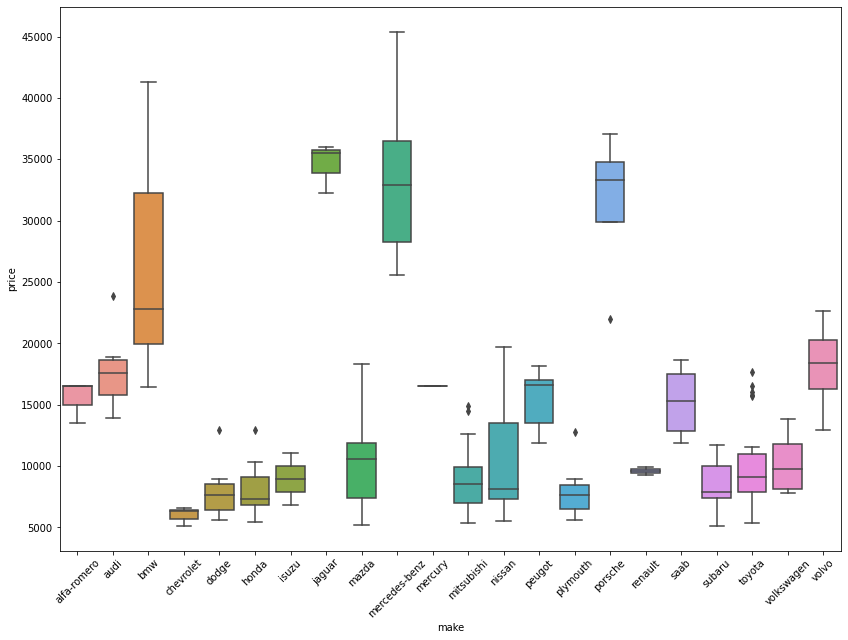

In [29]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.boxplot(x="make", y="price", data=automobile_data_copy)
plt.xticks(rotation=45)
plt.show()

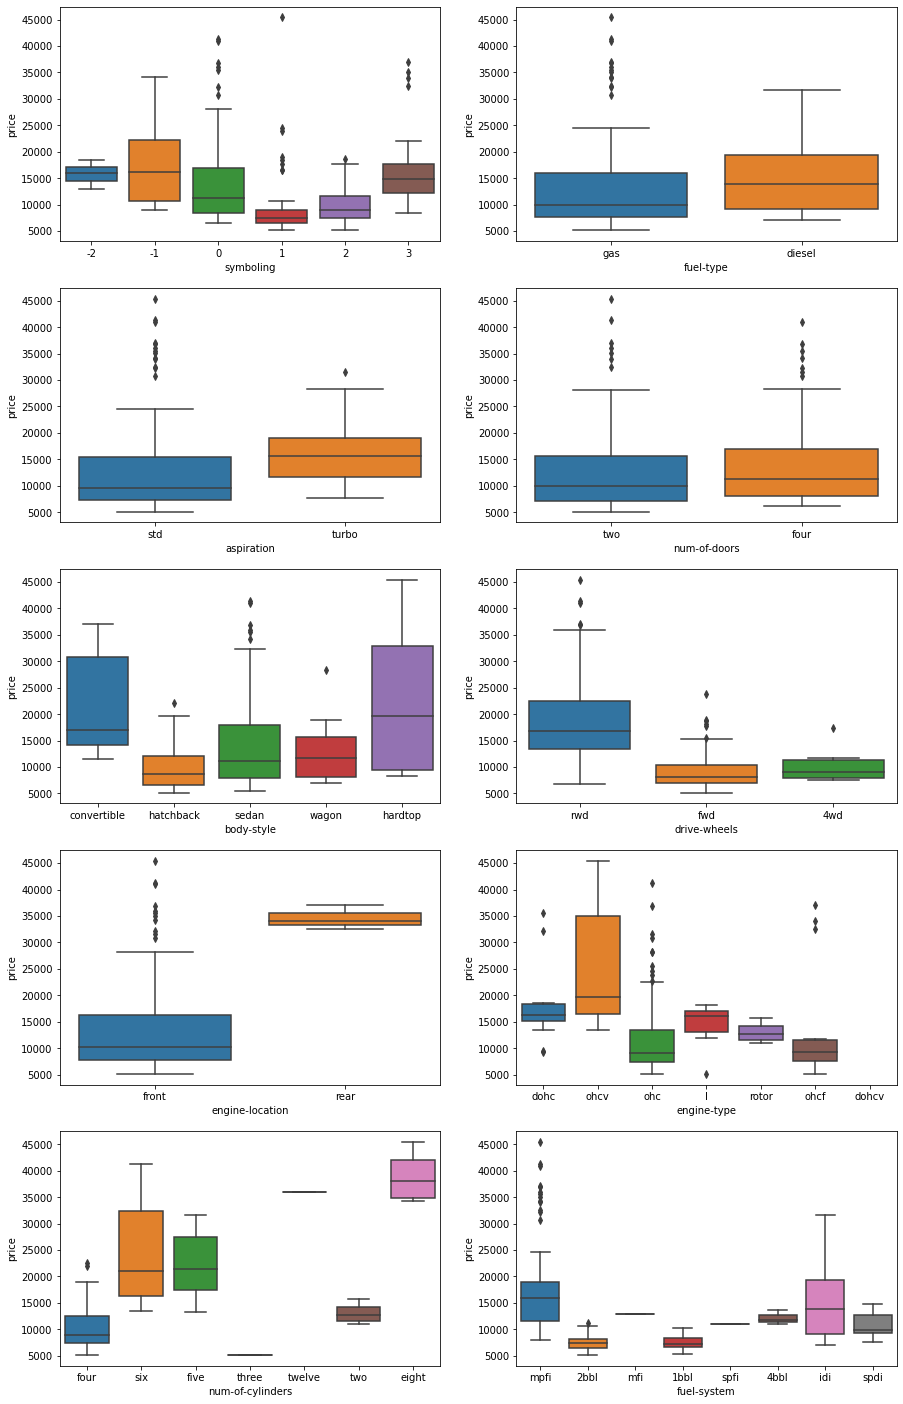

In [30]:
#colors = ['#446BAD']
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,25))
for indice, variable in enumerate(variablesCategoricas.index.drop(["make"])):
    plt.subplot(5,2,indice+1)
    sns.boxplot(x=automobile_data_copy[variable], y="price", data=automobile_data_copy)
plt.show()

- Los automoviles con un factor de riesgo -1 y 0 tienen un rango de precios más amplio.
- El precio para los automoviles disel es más alto, pero los automoviles a gas tiene unos outliers.
- Los automóviles turbo son un poco más caros que los std.
- El precio de los automóviles con dos y cuatro puertas es similar.
- El rango de precios de los automóviles hardtop es más amplio que para los hatchback, sedan, wagon. Y para los automóviles convertibles, los precios son más altos.
- Los automóviles con ruedas motrices rwd tienen un rango de precios más amplio y son más caros comparados con los fwd y 4wd.
- Los automóviles con el motor en la parte trasera son más caros que los que tienen el motor en la parte delantera.
- Los automóviles con el tipo de motor ohcv, tienen un precio mayor.
- El precio de los autómoviles con 9 cilindros es mayor que los de 12 cilindros. Para los demás automoviles a mayor numero de cilindros mayor precio.
- El sistema de combustión mpfi y idi tienen los precios más altos; para los demás, 2bbl, mfi, 1bbl, spfi, 4bl, spdi el rango de precios es más condensado.


## Preparación de los datos

In [65]:
# Se se extrae la columna price que es la variable dependiente
y = automobile_data_copy.price
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [66]:
# Extrae la variable precio que es la variable dependiente
X = automobile_data_copy.drop(["price"], axis=1)
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


### Revisión de la varianza

In [67]:
from sklearn.feature_selection import VarianceThreshold

varianceThreshold = VarianceThreshold(
    threshold=0.8 * (1 - 0.8),
)
varianceThreshold.fit_transform(automobile_data_copy[list(variablesNumericas.index)])

array([[       nan, 8.8600e+01, 1.6880e+02, ..., 2.1000e+01, 2.7000e+01,
        1.3495e+04],
       [       nan, 8.8600e+01, 1.6880e+02, ..., 2.1000e+01, 2.7000e+01,
        1.6500e+04],
       [       nan, 9.4500e+01, 1.7120e+02, ..., 1.9000e+01, 2.6000e+01,
        1.6500e+04],
       ...,
       [9.5000e+01, 1.0910e+02, 1.8880e+02, ..., 1.8000e+01, 2.3000e+01,
        2.1485e+04],
       [9.5000e+01, 1.0910e+02, 1.8880e+02, ..., 2.6000e+01, 2.7000e+01,
        2.2470e+04],
       [9.5000e+01, 1.0910e+02, 1.8880e+02, ..., 1.9000e+01, 2.5000e+01,
        2.2625e+04]])

In [68]:
varianceThreshold.variances_

array([1.24848780e+03, 3.60848957e+01, 1.51466207e+02, 4.57945128e+00,
       5.94167377e+00, 2.69785397e+05, 1.72565482e+03, 7.44511819e-02,
       9.98108908e-02, 1.57001428e+01, 1.56946148e+03, 2.28629790e+05,
       4.25908388e+01, 4.71917668e+01, 6.28416552e+07])

- Se desea remover las columnas que tengan más del 80% de sus valores iguales. Es decir una varianza inferior a 0.8(0.8-1)=0.16
- Pasa este caso tenemos dos variables en la posición 7 y 8, empezando desde 0.

In [69]:
# variables de resultado
varianceThreshold.get_feature_names_out()

array(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'], dtype=object)

In [70]:
# se encuentran las variables a eliminar
varBajaVarianza = set(variablesNumericas.index) - set(varianceThreshold.get_feature_names_out())
varBajaVarianza

{'bore', 'stroke'}

In [71]:
# se eliman las variables
X = X.drop(list(varBajaVarianza), axis=1)
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2548,dohc,four,130,mpfi,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2548,dohc,four,130,mpfi,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2823,ohcv,six,152,mpfi,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,2337,ohc,four,109,mpfi,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,2824,ohc,five,136,mpfi,8.0,115.0,5500.0,18,22


### Escalamiento de los datos

In [89]:
# estandarizar los datos
estan_var = make_column_transformer(
                    (
                        MinMaxScaler(),
                        make_column_selector(dtype_include=np.number),
                    ), 
                    remainder="passthrough",
                )

In [90]:
X_minmax = estan_var.fit_transform(X)
X_minmax = pd.DataFrame(X_minmax)

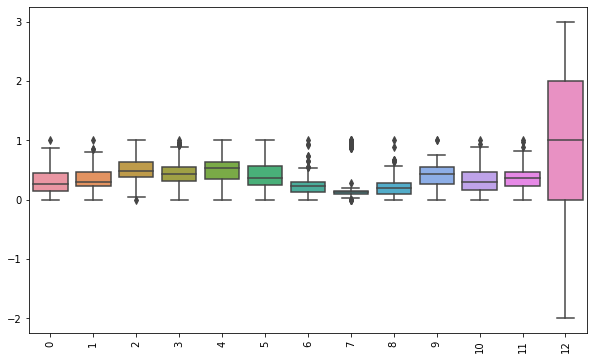

In [91]:
# rango de los datos
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_minmax)
plt.xticks(rotation=90)
plt.show()

### Codificación de las variables categóricas

In [92]:
# se codifican las variables
column_trans = make_column_transformer(
                    (
                        OneHotEncoder(),
                        make_column_selector(dtype_include=object),
                    ), 
                    remainder="passthrough",
                )
  

In [114]:
# se entrena
column_trans.fit(X_minmax)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000250E9A0A730>)])

In [115]:
# se transforman las columnas
x_cod = column_trans.transform(X_minmax).toarray()

In [116]:
pd.DataFrame(x_cod).head(5)

,0,1,2,3,4,5,6,7,8,9,...,720,721,722,723,724,725,726,727,728,729
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [117]:
# ver las variables de salida
# revisar el tipo de dato
x_ = pd.DataFrame(
    column_trans.transform(X_minmax).toarray(),
    columns=column_trans.get_feature_names_out(),
)

In [119]:
x_.head()

,onehotencoder__x0_0.0,onehotencoder__x0_0.04712041884816753,onehotencoder__x0_0.06282722513089006,onehotencoder__x0_0.0680628272251309,onehotencoder__x0_0.08376963350785338,onehotencoder__x0_0.09424083769633507,onehotencoder__x0_0.10471204188481675,onehotencoder__x0_0.11518324607329844,onehotencoder__x0_0.12565445026178013,onehotencoder__x0_0.13089005235602097,...,onehotencoder__x21_twelve,onehotencoder__x21_two,onehotencoder__x22_1bbl,onehotencoder__x22_2bbl,onehotencoder__x22_4bbl,onehotencoder__x22_idi,onehotencoder__x22_mfi,onehotencoder__x22_mpfi,onehotencoder__x22_spdi,onehotencoder__x22_spfi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Selección de variables más relevantes